In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('kc_house_data.csv',sep=",")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
print(df.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


Data description :
    id : notation to help identify the house
    date : Date house was sold
    price : price of the house
    bedrooms : number of bedrooms in the house 
    bathrooms : number of bathrooms in the house 
    sqft_living : square footage of the living room
    sqft_lot : square footage of all the lot
    floors : numbers of floors (level)
    waterfront : if the house hase or not a waterfront
    view : house have been viewed
    ... : ??? (we will probably drop this one since there is no information about this data)
    grade: grade of the house  
    sqft_above : square foot of the house not including the basement
    sqft_basement : square foot of the basement
    yr_built : year when house was built
    yr_renovated : year when house was renovated
    zipcode : zipcode for location of the house
    lat : latitude (geographic coordinate)
    long : longitude (geographic coordinate)
    sqft_living15 : square footage of the living room in 2015 
        (if not = sqft_living
        then implies there was a renovation in 2015)
    sqft_lot15 : square footage of the loft  in 2015 
        (if not = sqft_lot
        then implies there was a renovation in 2015)

In [4]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
df['bathrooms'] = df['bathrooms'].astype(np.int64)
df['floors'] = df['floors'].astype(np.int64)
print(df.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms          int64
sqft_living        int64
sqft_lot           int64
floors             int64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


C:\Users\21265\anaconda3\lib\site-packages\seaborn\axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

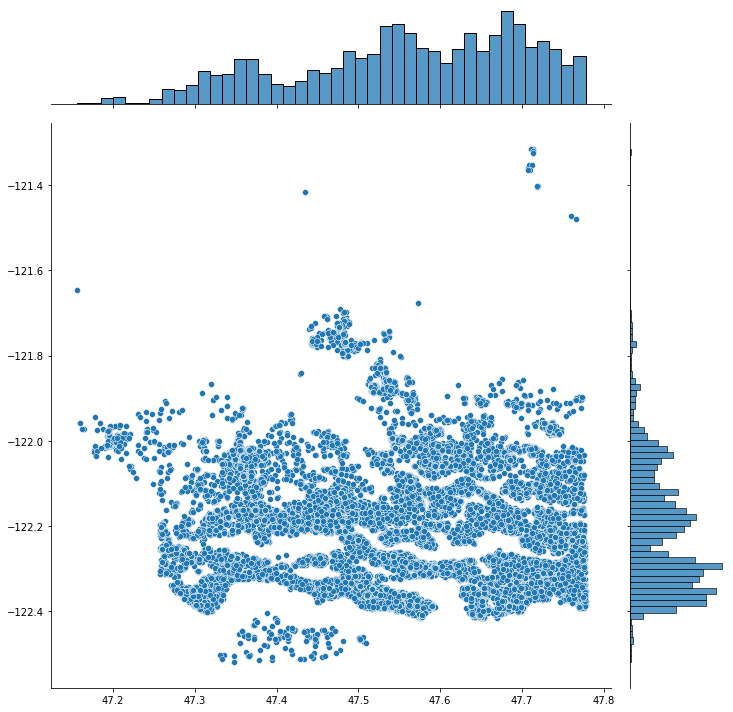

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [6]:
plt.figure(figsize=(10,10))
sns.jointplot(x=df.lat.values, y=df.long.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
sns.despine

In [7]:
df['date']=[x[:8] for x in df['date']]
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900.0,3,1,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000.0,3,2,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000.0,2,1,770,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000.0,4,3,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000.0,3,2,1680,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
del df['lat']
del df['long']
del df['view']
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,7129300520,20141013,221900.0,3,1,1180,5650,1,0,3,7,1180,0,1955,0,98178,1340,5650
1,6414100192,20141209,538000.0,3,2,2570,7242,2,0,3,7,2170,400,1951,1991,98125,1690,7639
2,5631500400,20150225,180000.0,2,1,770,10000,1,0,3,6,770,0,1933,0,98028,2720,8062
3,2487200875,20141209,604000.0,4,3,1960,5000,1,0,5,7,1050,910,1965,0,98136,1360,5000
4,1954400510,20150218,510000.0,3,2,1680,8080,1,0,3,8,1680,0,1987,0,98074,1800,7503


In [9]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,1.749734,2079.899736,1.510697e+04,1.446213,0.007542,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.734873,918.440897,4.142051e+04,0.551894,0.086517,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.000000,1427.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.000000,1910.000000,7.618000e+03,1.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.000000,2550.000000,1.068800e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.000000,1.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,6210.000000,871200.000000


C:\Users\21265\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


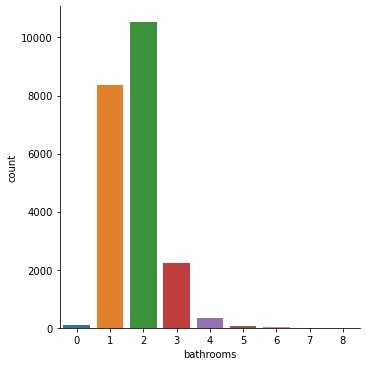

In [10]:
sns.catplot('bathrooms',data=df,kind='count')

C:\Users\21265\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


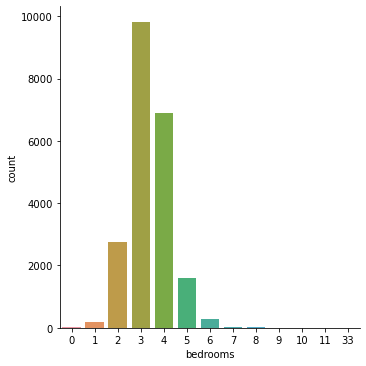

In [11]:
sns.catplot('bedrooms',data=df,kind='count')

C:\Users\21265\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


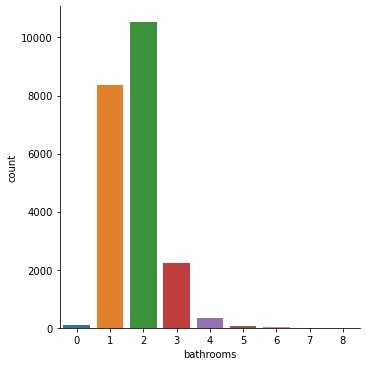

In [12]:
sns.catplot('bathrooms',data=df,kind='count')

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

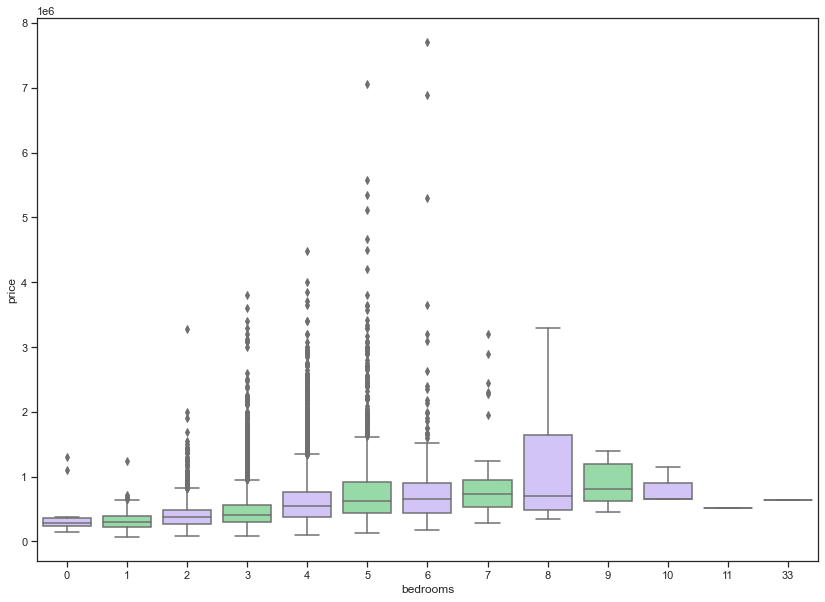

In [13]:
sns.set(style='ticks',palette='pastel')
fig, ax = plt.subplots(figsize=(14,10)) 
sns.boxplot(x='bedrooms',y='price',palette=["m", "g"], data=df,ax=ax)

C:\Users\21265\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


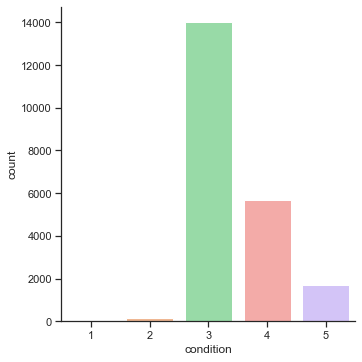

In [14]:
sns.catplot('condition',data=df,kind='count')

<AxesSubplot:>

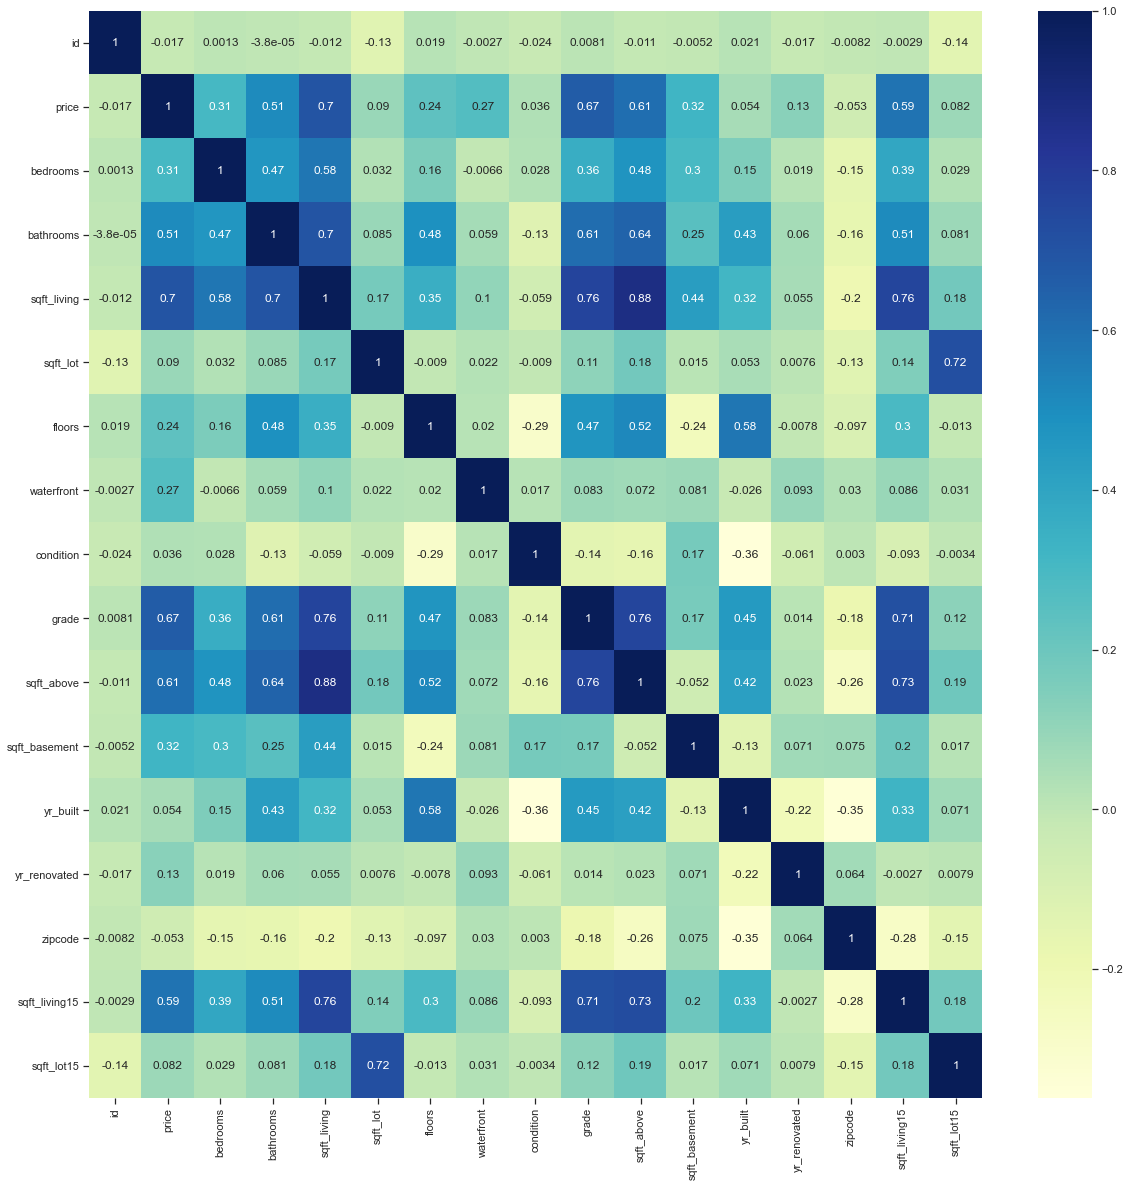

In [15]:
df1=df[['price', 'bedrooms', 'bathrooms', 'sqft_living',
    'sqft_lot', 'floors', 'waterfront', 'condition', 'grade',
    'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
     'sqft_living15', 'sqft_lot15']]
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(df.corr(),cmap = 'YlGnBu',annot=True,ax=ax)

bedrooms
0     AxesSubplot(0.125,0.125;0.775x0.755)
1     AxesSubplot(0.125,0.125;0.775x0.755)
2     AxesSubplot(0.125,0.125;0.775x0.755)
3     AxesSubplot(0.125,0.125;0.775x0.755)
4     AxesSubplot(0.125,0.125;0.775x0.755)
5     AxesSubplot(0.125,0.125;0.775x0.755)
6     AxesSubplot(0.125,0.125;0.775x0.755)
7     AxesSubplot(0.125,0.125;0.775x0.755)
8     AxesSubplot(0.125,0.125;0.775x0.755)
9     AxesSubplot(0.125,0.125;0.775x0.755)
10    AxesSubplot(0.125,0.125;0.775x0.755)
11    AxesSubplot(0.125,0.125;0.775x0.755)
33    AxesSubplot(0.125,0.125;0.775x0.755)
Name: price, dtype: object

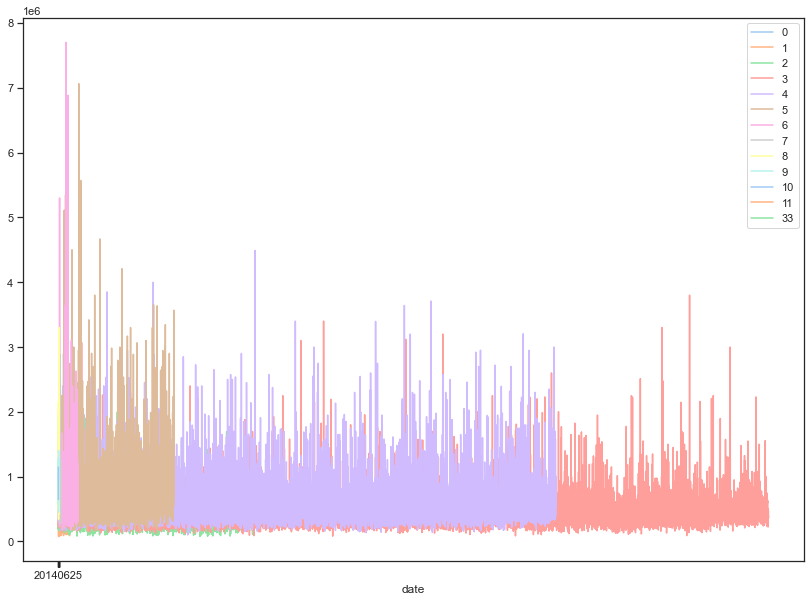

In [16]:
ig,ax=plt.subplots(figsize=(14,10))
df.set_index('date').groupby('bedrooms')['price'].plot(legend=True)

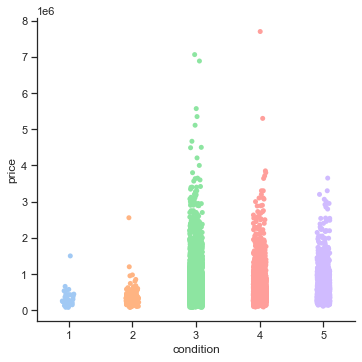

In [17]:
sns.catplot(x='condition',y='price',data=df)

In [18]:
y=df['price'];
features=['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','condition','grade','sqft_above','sqft_basement',
         'yr_built','yr_renovated','zipcode','sqft_living15','sqft_lot15'];
X=df[features];
X_train, X_valid, y_train,y_valid= train_test_split(X,y,test_size=0.2,random_state=0);

model=LinearRegression(fit_intercept=True);
model.fit(X_train,y_train);
preds=model.predict(X_valid);

In [19]:
print(model.coef_)
print(model.intercept_)

[-3.95641148e+04  5.52445284e+04  1.13563446e+02  5.79495518e-02
  2.71623293e+04  7.36220057e+05  2.17597014e+04  1.21272708e+05
  4.69076019e+01  6.66558440e+01 -3.67450384e+03  1.17546423e+01
  8.76666519e+01  3.80797609e+01 -5.93198643e-01]
-2234797.687112391


ls=LinearRegress()
ls.train(X_train,y_train)
y_pred=ls.use(X_test)
fig,ax=plt.subplots(figsize=(10,7))
plt.scatter(y_test,y_pred)
plt.plot(X_test,ls.use(X_test))

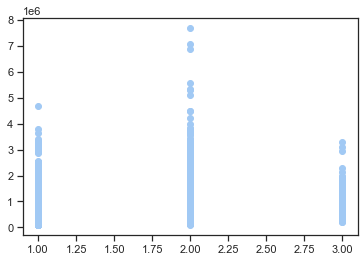

In [20]:
plt.scatter(df.floors,df.price)

In [26]:
reg = LinearRegression()
labels = df['price']
conv_dates = [1 if values == 2014 else 0 for values in df.date ]
df['date'] = conv_dates
train1 = df.drop(['id', 'price'],axis=1)
x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.10,random_state =2)
reg.fit(x_train,y_train)

LinearRegression()

In [27]:
reg.score(x_test,y_test)

0.6879357582693311

In [28]:
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')
clf.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [29]:
clf.score(x_test,y_test)

0.8834528124621673

In [30]:
original_params = {'n_estimators': 400, 'max_depth': 5,'min_samples_split': 2,'random_state': 2,'learning_rate': 0.1,
 'loss':'ls'}
params = dict(original_params)

In [31]:
t_sc = np.zeros((params['n_estimators']),dtype=np.float64)

In [32]:
y_pred = reg.predict(x_test)

In [33]:
for i,y_pred in enumerate(clf.staged_predict(x_test)):
    t_sc[i]=clf.loss_(y_test,y_pred)

In [34]:
testsc = np.arange((params['n_estimators']))+1

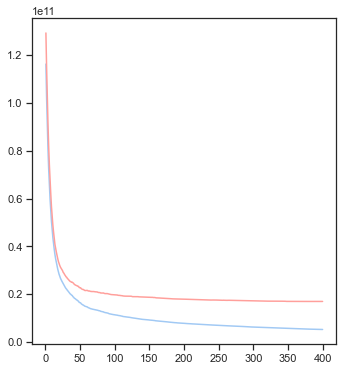

In [35]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(testsc,clf.train_score_,'b-',label= 'Set dev train')
plt.plot(testsc,t_sc,'r-',label = 'set dev test')

In [36]:
pca = PCA()
pca.fit_transform(scale(train1))

array([[-2.40639739e+00, -3.82832658e-01, -1.65492248e-01, ...,
         4.81883144e-02, -9.37441652e-17,  0.00000000e+00],
       [ 5.65650914e-02,  5.16506146e-01, -8.92915311e-01, ...,
        -9.49057085e-01,  3.97858597e-14,  0.00000000e+00],
       [-2.41381169e+00, -3.89175652e-01,  7.48419895e-01, ...,
         5.05802579e-01,  8.91781124e-15,  0.00000000e+00],
       ...,
       [-2.46356779e+00, -2.34689282e+00,  3.20523664e-01, ...,
        -7.36773862e-01,  6.91105598e-17, -0.00000000e+00],
       [ 1.39165940e-01, -2.02258205e+00,  8.70668767e-02, ...,
         2.88293693e-01,  1.71315127e-17,  0.00000000e+00],
       [-2.47556711e+00, -2.33917648e+00,  2.98149026e-01, ...,
        -7.29337456e-01,  4.65663133e-17, -0.00000000e+00]])